In [1]:
# --- libs
from PIL import Image
from easydict import EasyDict
import os
import json
args = EasyDict()
from PIL import Image
import numpy as np 
Image.MAX_IMAGE_PIXELS = 933120000

# --- head 

args.img_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G/0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png"


# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)

# --- function
def add_padding(image_path, output_path, window_size):
    # Open the image
    original_image = Image.open(image_path)

    padding_size_width = int( window_size - original_image.size[0] % window_size / 2 )
    padding_size_height = int( window_size - original_image.size[1] % window_size / 2 )

    # Calculate the new size with padding
    new_width = original_image.width + 2 * padding_size_width
    new_height = original_image.height + 2 * padding_size_height

    # Create a new image with the desired size and a white background
    padded_image = Image.new("RGB", (new_width, new_height), (0, 0, 0, 255))

    # Paste the original image onto the new image with padding
    padded_image.paste(original_image, (padding_size_width, padding_size_height))

    # Save the result
    padded_image.save(output_path)


In [2]:
# Example usage
image_path = args.img_path
output_path = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/output_image_with_padding_black.png"

# padding_size = 500  # Adjust this value as needed

add_padding(image_path, output_path, window_size=200)


In [30]:
original_image = Image.open(image_path)
original_image.size

(7410, 7220)

In [4]:
original_image.size[0] % 100 /2 

5.0

In [10]:
after_image = Image.open(output_path)
after_image.size

(7800, 7600)

In [47]:
#--- sample
from patchify import patchify
import matplotlib.pyplot as plt

sample_img =  Image.open("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/0-Pusan-2023-AO_7_C1_20230515015009_11919_00051985_L1G_PS_5.png")

sample_img = np.asarray(sample_img) 
patches = patchify(sample_img, (200,200,4), step=200)
print(patches.shape)


(5, 5, 1, 200, 200, 4)


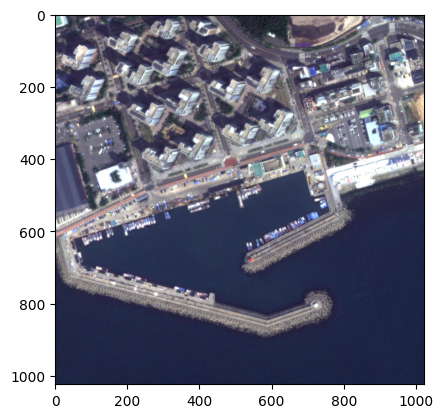

In [48]:
plt.imshow(sample_img)

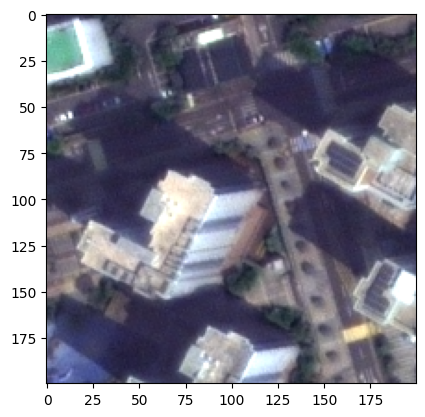

In [60]:

plt.imshow(patches[0][0][0])

In [61]:
p1 = np.array(patches[0][0][0])

for i in range(p1.shape[0]):
    for k in range(p1.shape[1]):
        # convert alpha to 0 
        p1[i][k][3] = 0
        

In [63]:
p1.shape

(200, 200, 4)

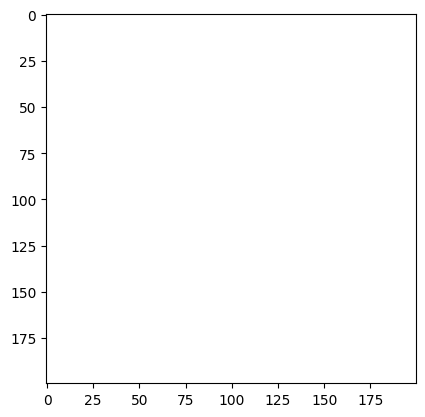

In [64]:
plt.imshow(p1)

In [11]:
# sliding window function ! 


after_image = Image.open("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/0-Pusan-2023-AO_7_C1_20230515015009_11919_00051985_L1G_PS_5.png")

after_image_np = np.array(after_image)
after_image_ls = after_image_np.tolist()


window_size = 200

patches= []
for slide_window_idx_row in range(0,after_image.size[0], window_size ):

    #print(slide_window_idx_row)
    #print(slide_window_idx_row + window_size)

    for slide_window_idx_col in range(0,after_image.size[1], window_size ):
        print("#-----")
        print(slide_window_idx_col)
        patch = after_image_ls[slide_window_idx_row:(slide_window_idx_row + window_size)][slide_window_idx_col:(slide_window_idx_col+window_size)]
        patches.append(patch)   

#-----
0
#-----
200
#-----
400
#-----
600
#-----
800
#-----
1000
#-----
0
#-----
200
#-----
400
#-----
600
#-----
800
#-----
1000
#-----
0
#-----
200
#-----
400
#-----
600
#-----
800
#-----
1000
#-----
0
#-----
200
#-----
400
#-----
600
#-----
800
#-----
1000
#-----
0
#-----
200
#-----
400
#-----
600
#-----
800
#-----
1000
#-----
0
#-----
200
#-----
400
#-----
600
#-----
800
#-----
1000


In [ ]:
from patchify import patchify
patches = patchify(image, (200, 200, 4), step=200)
print(patches.shape)  # (6, 10, 1, 512, 512, 3)

TypeError: Invalid shape (0,) for image data

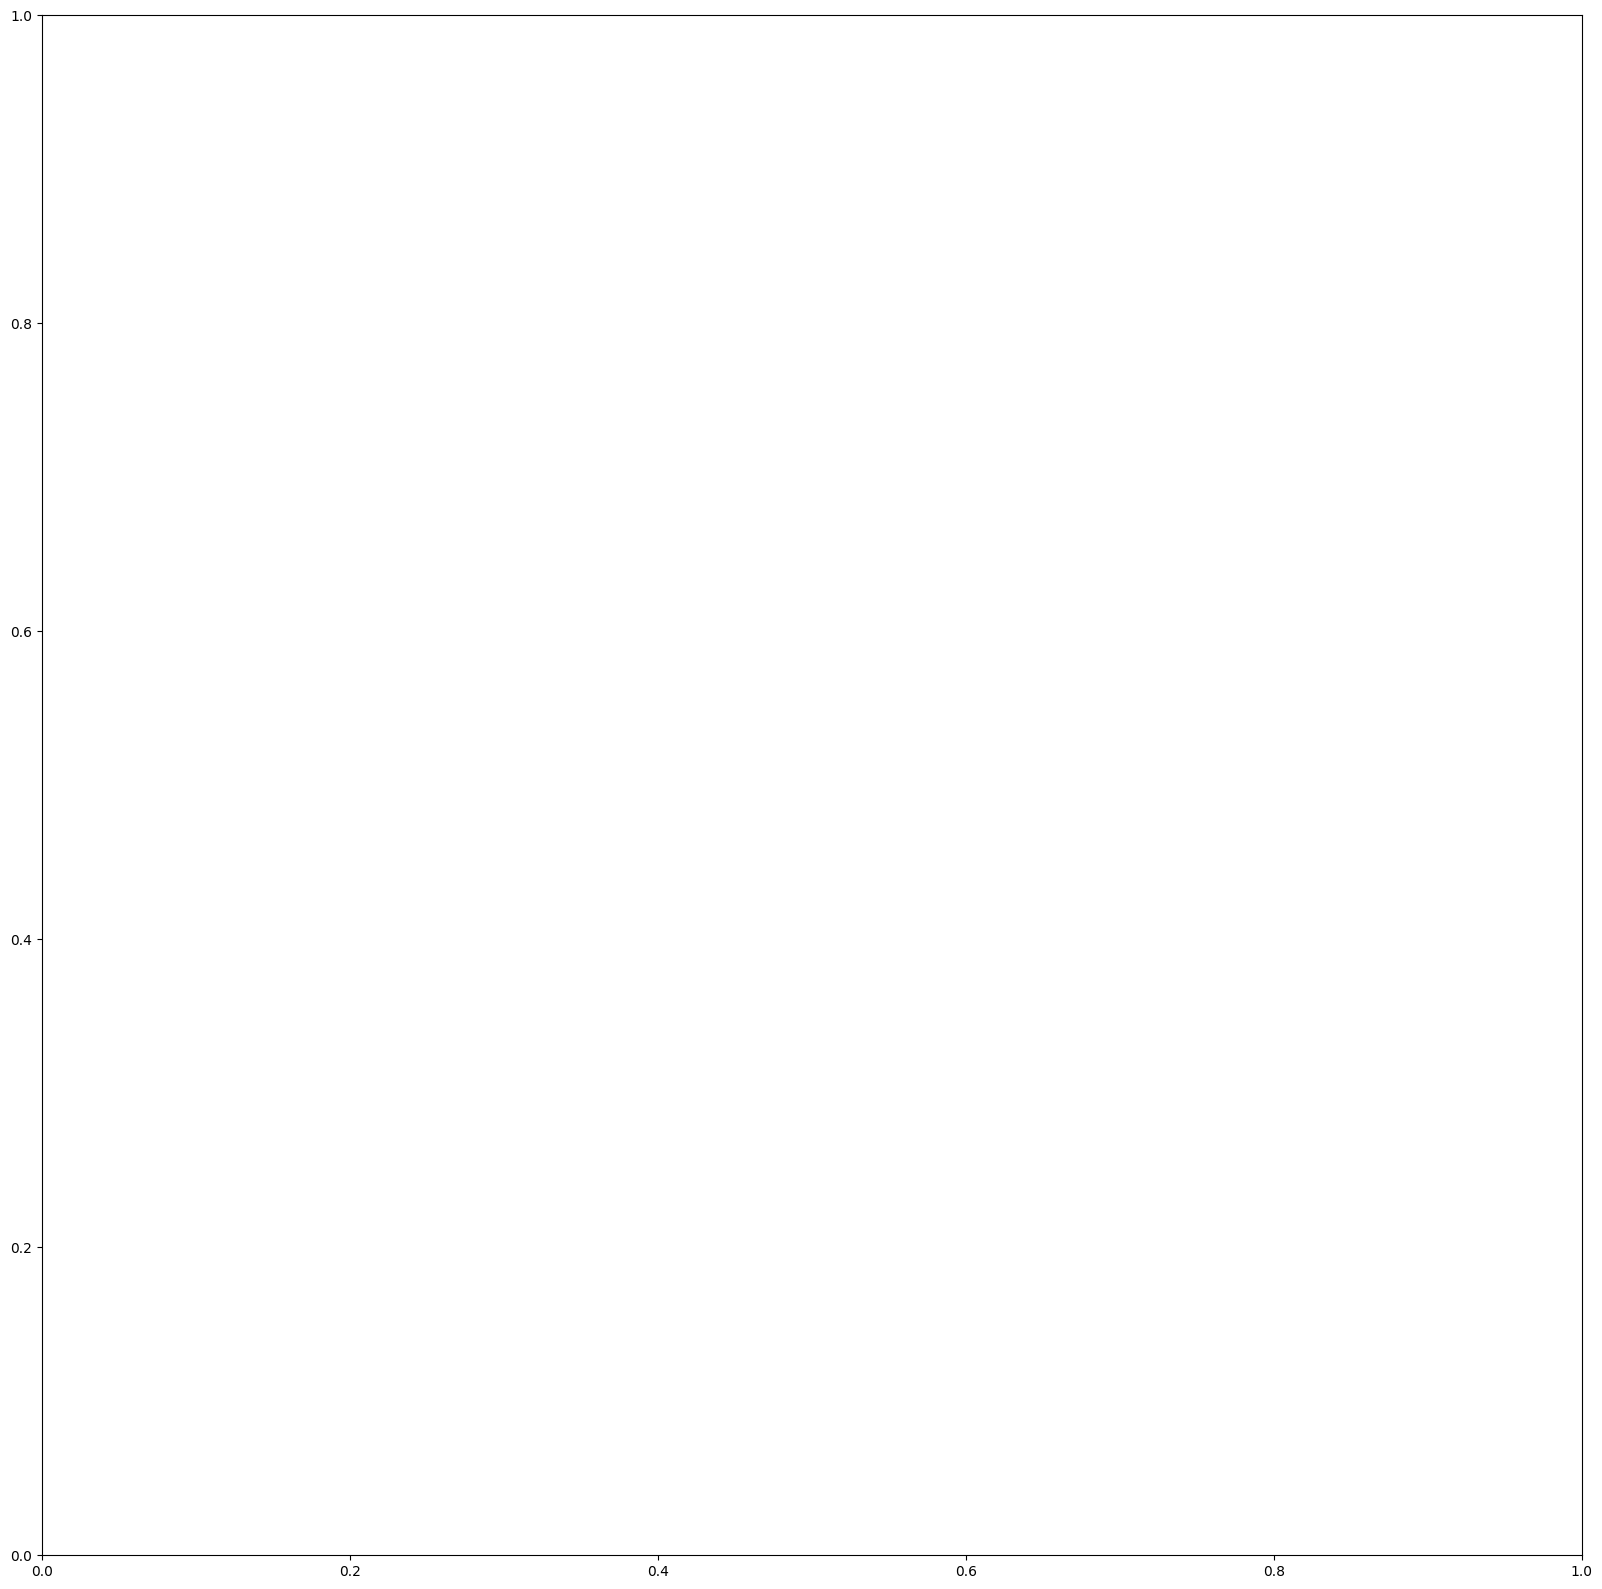

In [27]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,20))
plt.imshow(np.array(q1))

In [ ]:
# alpha 가 0이 되면 된다~ 

In [61]:
len(patch), len(patch[0])

IndexError: list index out of range

In [63]:
patch

[]